In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import plotly.graph_objs as go
import matplotlib.pyplot as plt
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# Setup the transport and client
_transport = RequestsHTTPTransport(
    url='http://209.38.172.107/graphql/',
    use_json=True,
)

client = Client(
    transport = _transport,
    fetch_schema_from_transport=True,
)

# Define Query
query = gql('''
query playerPositions {
  playerTotalsAll {
    position
    season
    id
  }
}
''')

# Execute and store response

response = client.execute(query)


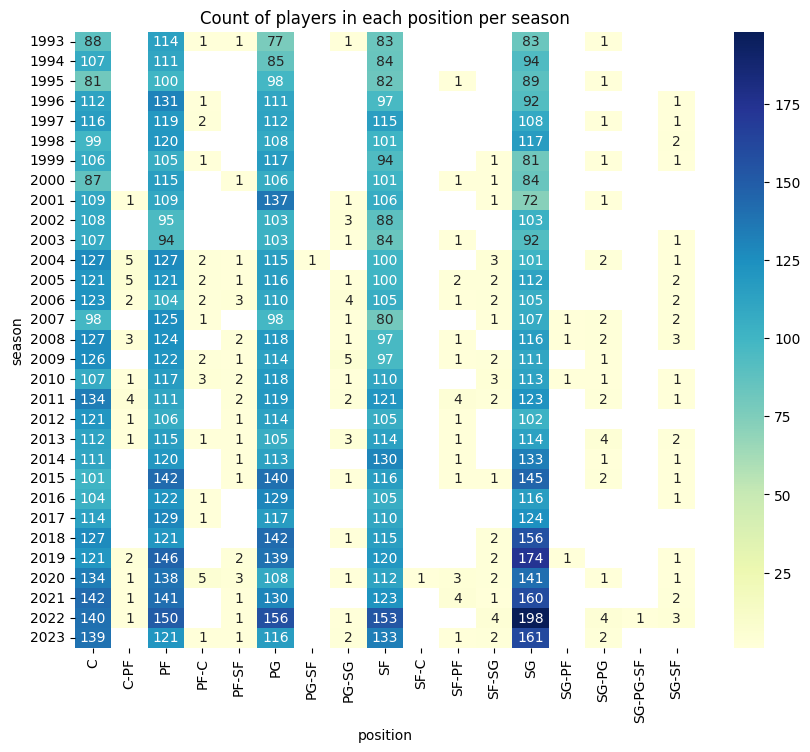

In [3]:
df = pd.DataFrame(response['playerTotalsAll'])

df_grouped = df.groupby(['season', 'position']).size().reset_index(name='counts')

pivot_table = df_grouped.pivot(index='season', columns='position', values='counts')

# create a function for formatter
fmt = lambda x,pos: '{:.0f}'.format(x)

# Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='.0f',
            cbar_kws={'format': ticker.FuncFormatter(fmt)})
plt.title('Count of players in each position per season')


plt.show()